In [1]:
import networkx as nx
from queue import PriorityQueue

In [2]:
def build_weighted_graph():
    graph = nx.Graph()
    edge_list = [(1,2, {"weight":1}),
                 (2,3, {"weight":3}),
                 (1,3, {"weight":1}),
                 (3,4, {"weight":1}),
                 (2,4, {"weight":3}),
                 (1,5, {"weight":1}),
                 (4,5, {"weight":1}),
                 (3,5, {"weight":1}),
                 (5,6, {"weight":2}),
                 (6,7, {"weight":1}),
                 (5,7, {"weight":4})]
    graph.add_edges_from(edge_list)
    return graph

In [3]:
def plot_graph(graph : nx.Graph):
    pos = nx.spring_layout(graph)
    nx.draw_networkx(graph, with_labels=True, pos=pos)
    edge_labels = dict([((n1, n2), f'{graph[n1][n2]["weight"]}')
                        for n1, n2 in graph.edges])
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

In [4]:
def dijkstra(graph : nx.Graph, start : int):
    """Runs Dijkstra's algorithm on the given input graph and collects shortest path retrieval information.

    Args:
        graph (nx.Graph): Input network.
        start (int): ID of start node.

    Returns:
        dict: Dictionary storing for each node the distance to the start node.
        dict: Dictionary storing for each node the predecessor node in a shortest path.
    """
    # Data structure initialization.
    settled = set()
    tentatives = {start : 0}
    predecessors = {start : -1}
    prio_queue = PriorityQueue()
    prio_queue.put((0, start))
    
    num_nodes = graph.number_of_nodes()
    # Start iterating with node 0.
    while len(settled)!=num_nodes:
        # Take next node in prio queue.
        next = prio_queue.get()
        
        # Check if already settled.
        if next[1] in settled:
            continue
        
        # Else, traverse neighbors and update their tentative distances.
        for nbor in graph.neighbors(next[1]):
            current_path_distance = tentatives[next[1]]+(graph[next[1]][nbor])['weight']
            if not nbor in tentatives or current_path_distance < tentatives[nbor]:
                # Update tentative distance of neighbor.
                tentatives[nbor] = current_path_distance
                prio_queue.put((current_path_distance, nbor))
                predecessors[nbor] = next[1]
        
        # Current node is now settled.
        settled.add(next[1])
    
    return tentatives, predecessors
    

Distances: {2: 0, 1: 1, 3: 2, 4: 3, 5: 2, 6: 4, 7: 5}
Predecessors: {2: -1, 1: 2, 3: 1, 4: 2, 5: 1, 6: 5, 7: 6}


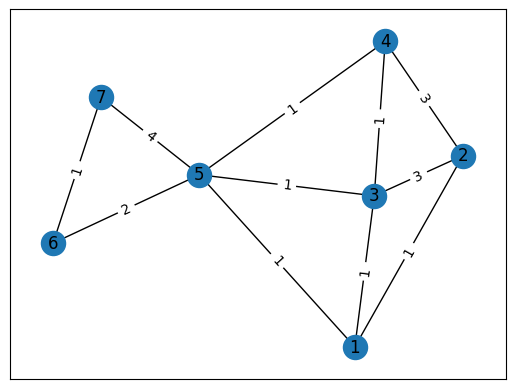

In [5]:
graph = build_weighted_graph()
plot_graph(graph)

distances, predecessors = dijkstra(graph, 2)
print("Distances:", distances)
print("Predecessors:", predecessors)
